# Explorational Plotting for the Neutrino Flux from a Muon Beam

In [1]:
from muon_decay import *

import matplotlib.pyplot as plt
from matplotlib import cm, ticker
from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

### Old Flux From A. Cervera et al, 2000

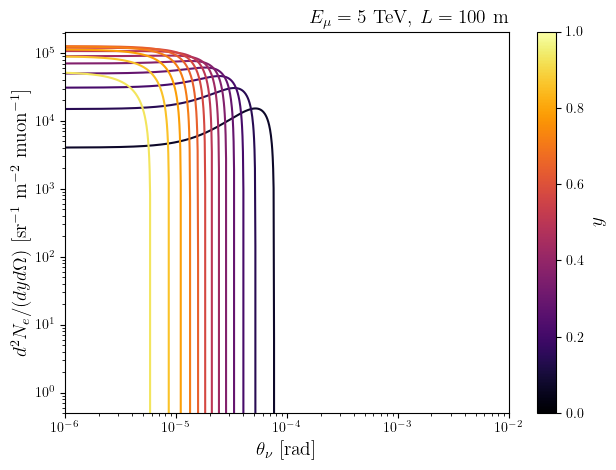

In [2]:
Emu = 5.0e6  # 5 TeV
l_det = 100.0  # meters
Enus = np.linspace(0.0, 1.0, 15)*Emu
thetas = np.logspace(-6, -2, 1000)
colors = plt.cm.inferno(np.linspace(0.0, 1.0, len(Enus)))


for i, enu in enumerate(Enus):
    d2n_nu_e = d2NdydOmega_nue(enu/Emu, thetas, Emu, l_det, 1.0)
    d2n_nu_mu = d2NdydOmega_numu(enu/Emu, thetas, Emu, l_det, 1.0)

    plt.plot(thetas, d2n_nu_e, ls='solid', color=colors[i])
    #plt.plot(thetas, d2n_nu_mu, ls='solid', color=colors[i])

sm = plt.cm.ScalarMappable(cmap="inferno")


cbar = plt.colorbar(sm)
cbar.set_label(label=r"$y$", weight='bold', fontsize=14)

plt.xscale('log')
plt.yscale('log')
plt.xlim((thetas[0], thetas[-1]))
plt.ylabel(r"$d^2 N_e / (dy d\Omega)$ [sr$^{-1}$ m$^{-2}$ muon$^{-1}$]", fontsize=14)
plt.xlabel(r"$\theta_\nu$ [rad]", fontsize=14)
plt.title(r"$E_\mu = 5$ TeV, $L = 100$ m", loc="right", fontsize=14)
plt.ylim(bottom=5e-1)
plt.tight_layout()
plt.show()

/tmp/ipykernel_183967/463035503.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((ys[0], ys[-1]))


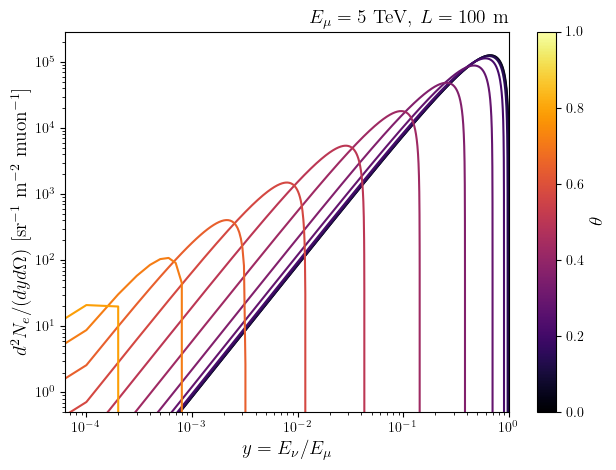

In [3]:
# plot energy fraction dist.
thetas = np.logspace(-6, -2, 15)
colors = plt.cm.inferno(np.linspace(0.0, 1.0, len(thetas)))
ys = np.linspace(0.0, 1.0, 10000)
for i, th in enumerate(thetas):
    d2n_nu_e = d2NdydOmega_nue(ys, th, Emu, l_det, 1.0)
    d2n_nu_mu = d2NdydOmega_numu(ys, th, Emu, l_det, 1.0)

    plt.plot(ys, d2n_nu_e, ls='solid', color=colors[i])
    #plt.plot(thetas, d2n_nu_mu, ls='solid', color=colors[i])

sm = plt.cm.ScalarMappable(cmap="inferno")


cbar = plt.colorbar(sm)
cbar.set_label(label=r"$\theta$", weight='bold', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xlim((ys[0], ys[-1]))
plt.ylabel(r"$d^2 N_e / (dy d\Omega)$ [sr$^{-1}$ m$^{-2}$ muon$^{-1}$]", fontsize=14)
plt.xlabel(r"$y = E_\nu / E_\mu$", fontsize=14)
plt.title(r"$E_\mu = 5$ TeV, $L = 100$ m", loc="right", fontsize=14)
plt.ylim(bottom=5e-1)
plt.tight_layout()
plt.show()

## New Flux from Broncano, Mena 2003

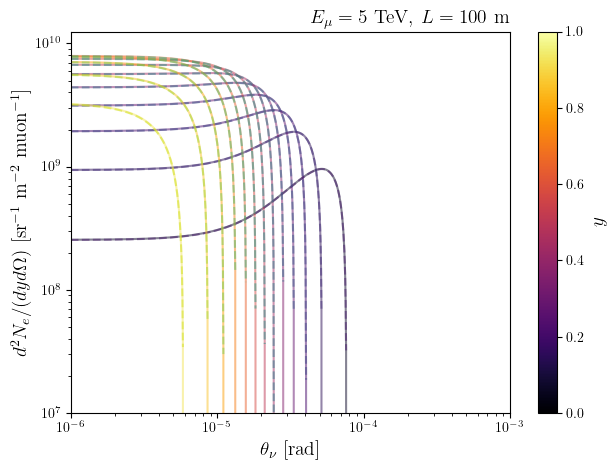

In [13]:
Emu = 5.0e6  # 5 TeV

nu_flux_gen = LabFrameNeutrinoFluxFromMuon(Emu)


l_det = 100.0  # meters
Enus = np.linspace(0.0, 1.0, 15)*Emu
thetas = np.logspace(-6, -3, 1000)
colors = plt.cm.inferno(np.linspace(0.0, 1.0, len(Enus)))

colors2 = plt.cm.viridis(np.linspace(0.0, 1.0, len(Enus)))


for i, enu in enumerate(Enus):

    # Old Flux
    d2n_nu_e = d2NdydOmega_nue(enu/Emu, thetas, Emu, l_det, 1.0)
    d2n_nu_mu = d2NdydOmega_numu(enu/Emu, thetas, Emu, l_det, 1.0)

    # New flux
    d2n_nu_e_BM2003 = nu_flux_gen.diff_flux_nuebar(enu, thetas, Pmu=0.0)

    plt.plot(thetas, (2*pi*l_det**2) * d2n_nu_e, ls='solid', color=colors[i], alpha=0.5)
    plt.plot(thetas, d2n_nu_e_BM2003, ls='dashed', color=colors2[i], alpha=0.5)

    #plt.plot(thetas, d2n_nu_mu, ls='solid', color=colors[i])

sm = plt.cm.ScalarMappable(cmap="inferno")


cbar = plt.colorbar(sm)
cbar.set_label(label=r"$y$", weight='bold', fontsize=14)

plt.xscale('log')
plt.yscale('log')
plt.xlim((thetas[0], thetas[-1]))
plt.ylabel(r"$d^2 N_e / (dy d\Omega)$ [sr$^{-1}$ m$^{-2}$ muon$^{-1}$]", fontsize=14)
plt.xlabel(r"$\theta_\nu$ [rad]", fontsize=14)
plt.title(r"$E_\mu = 5$ TeV, $L = 100$ m", loc="right", fontsize=14)
plt.ylim(bottom=1e7)
plt.tight_layout()
plt.show()